In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
print(df.shape)
print(df.columns)
df.head()

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


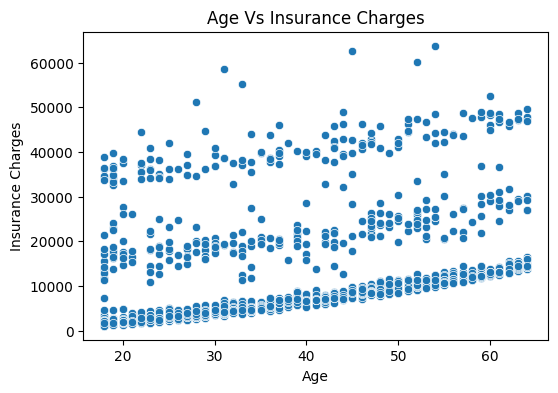

In [4]:
#Visualize Impact of BMI, Age, Smoker on Charges
#Age vs Charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='charges',data=df)
plt.title("Age Vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()

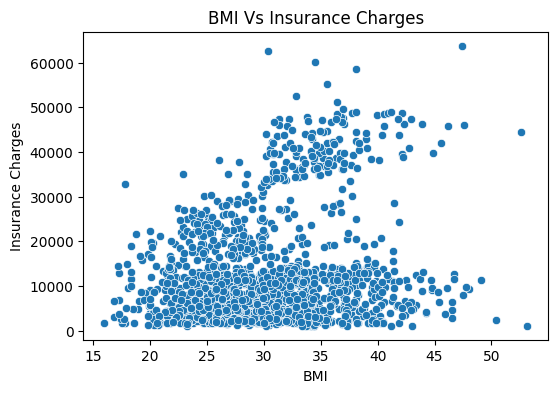

In [6]:
#BMI vs Insurance_charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title("BMI Vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()

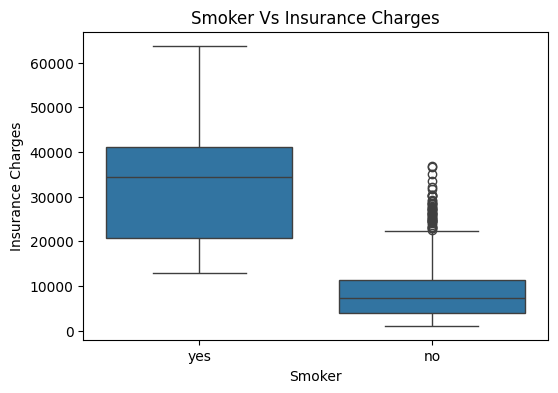

In [8]:
#Smoker vs Insurance_charges
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker',y='charges',data=df)
plt.title("Smoker Vs Insurance Charges")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")
plt.show()

In [9]:
#Encode Categorical Variables
df_encoded=pd.get_dummies(df,drop_first=True)

In [11]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X=df_encoded.drop('charges',axis=1)
Y=df_encoded['charges']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
#Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
#Evaluate the Model (MAE, RMSE)
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
Y_pred=lr.predict(X_test)
print("Mean absolute Error: ",mean_absolute_error(Y_test,Y_pred))
print("Root_Mean absolute Error: ",root_mean_squared_error(Y_test,Y_pred))


Mean absolute Error:  4181.19447375365
Root_Mean absolute Error:  5796.284659276273


In [16]:
#View Coefficients
coef_df=pd.DataFrame({
    'Feature':X.columns,
    'Coefficient':lr.coef_
}).sort_values(by='Coefficient',key=abs,ascending=False)
print(coef_df)

            Feature   Coefficient
4        smoker_yes  23651.128856
7  region_southwest   -809.799354
6  region_southeast   -657.864297
2          children    425.278784
5  region_northwest   -370.677326
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
